In [49]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [50]:
plt.style.use('ggplot')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09','#c79fef', '#80f9ad']

Generazione del dataset, a partire dalla funzione $f(x)$, aggiungendo rumore gaussiano

In [51]:
def f(x):
    return x*np.sin(x*10)*10
    
def p(r):
    return [stats.norm.rvs(loc=f(x), scale=0.3, size=1) for x in r]

In [52]:
# generate points used to plot
x_plot = np.linspace(0, 1, 1000)

# generate points and keep a subset of them
x = np.linspace(0, 1, 1000)
rng = np.random.RandomState(0)
rng.shuffle(x)
n = 50
x = np.sort(x[:n])
y = p(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

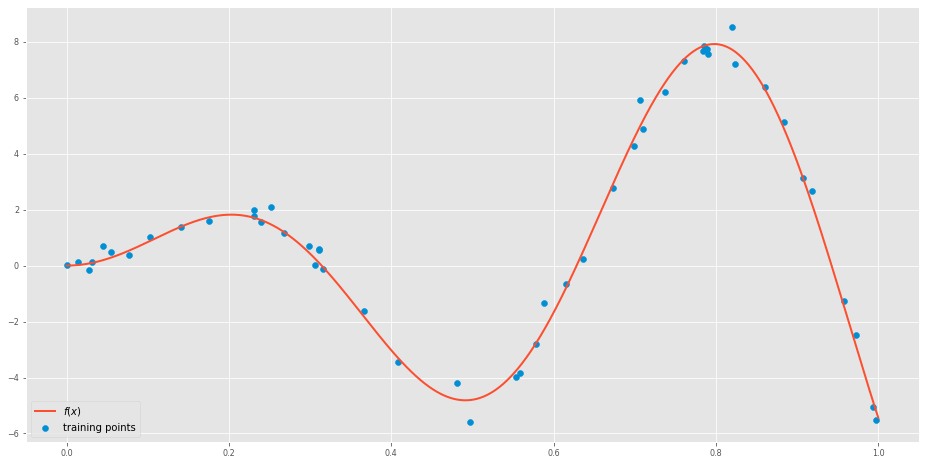

In [53]:
fig=plt.figure(figsize=(16,8))
plt.plot(x_plot, f(x_plot), color=colors[1], lw=2, label="$f(x)$")
plt.scatter(x, y, color=colors[0], marker='o', label="training points")
plt.legend(loc='lower left')
plt.show()

Separa train e test set

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

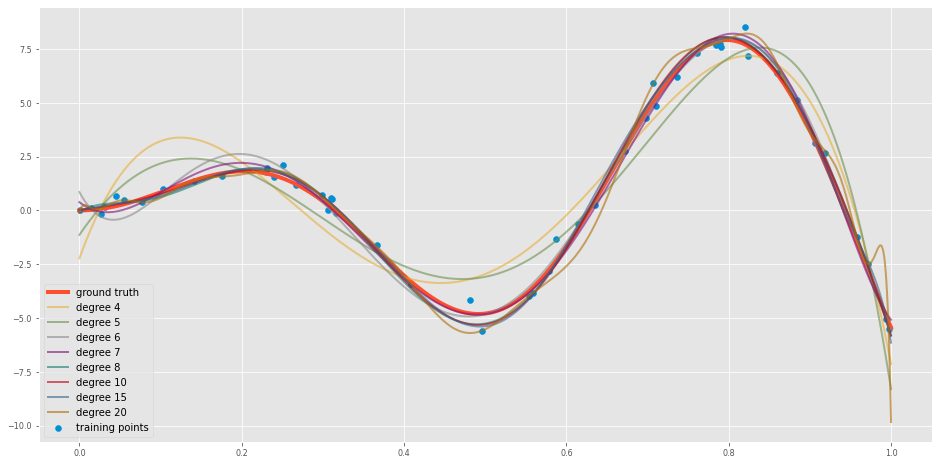

In [56]:
fig=plt.figure(figsize=(16,8))
plt.plot(x_plot, f(x_plot), color=colors[1], lw=4, label="ground truth")
plt.scatter(x, y, color=colors[0], marker='o', label="training points")
aic = []
bic = []
rmse_train = []
rmse_test = []
scores_train = []
scores_test = []
degs = [4, 5, 6, 7, 8, 10, 15, 20]
for count, degree in enumerate(degs):
    #model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    #model.fit(X, y)
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    rmse_train.append(np.sqrt(mean_squared_error(model.predict(X_train), y_train)))
    rmse_test.append(np.sqrt(mean_squared_error(model.predict(X_test), y_test)))
    scores_train.append(model.score(X_train,y_train))
    scores_test.append(model.score(X_test,y_test))
    #y_hat = model.predict(X)
    resid = y - model.predict(X)
    sse = np.sum(resid**2)
    beta = float(n)/sse
    k= degree+1
    aic.append(2*k + beta*np.log(sse)-n*np.log(beta/(2*np.pi)))
    bic.append(np.log(n)*k + beta*np.log(sse)-n*np.log(beta/(2*np.pi)))
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count+2],label="degree %d" % degree, alpha=.6)
plt.legend(loc='lower left')
plt.show()

In [57]:
df = pd.DataFrame(list(zip(degs,aic,bic,rmse_train, rmse_test, scores_train, scores_test)), 
                  columns=['degree', 'AIC', 'BIC', 'rmse train', 'rmse test', 'scores_train', 'scores_test'])
df.head(20)

,degree,AIC,BIC,rmse train,rmse test,scores_train,scores_test
0,4,128.101556,137.661672,1.390581,1.047291,0.872256,0.915494
1,5,123.050522,134.522660,1.264217,1.025425,0.894418,0.918986
2,6,42.975630,56.359791,0.495560,0.453794,0.983777,0.984134
3,7,36.345246,51.641430,0.422049,0.451529,0.988233,0.984292
4,8,25.950311,43.158518,0.283915,0.482550,0.994675,0.982060
5,10,30.308051,51.340304,0.277904,0.490773,0.994898,0.981443
6,15,40.224641,70.817009,0.261584,0.503367,0.995480,0.980478
7,20,90.016538,130.169021,0.181800,0.912433,0.997817,0.935857


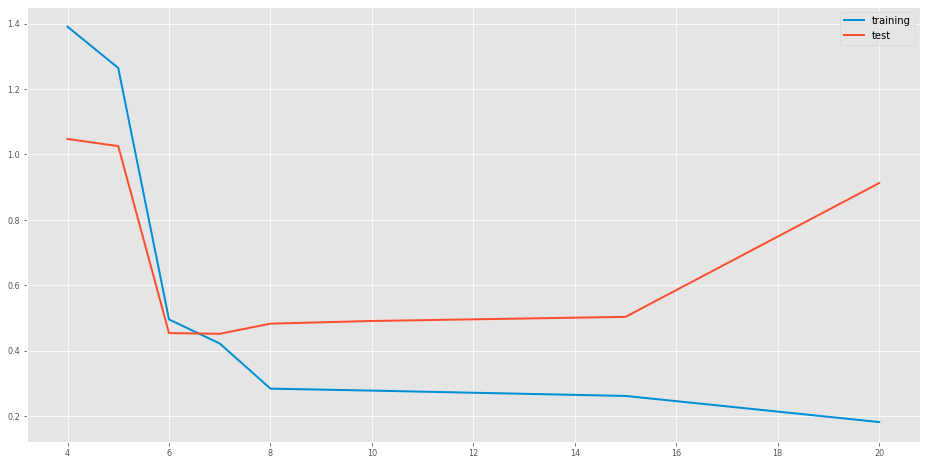

In [58]:
fig = plt.figure(figsize=(16,8))
plt.plot(degs, rmse_train, color=colors[0], label='training')
plt.plot(degs, rmse_test, color=colors[1], label='test')
plt.legend()
plt.show()

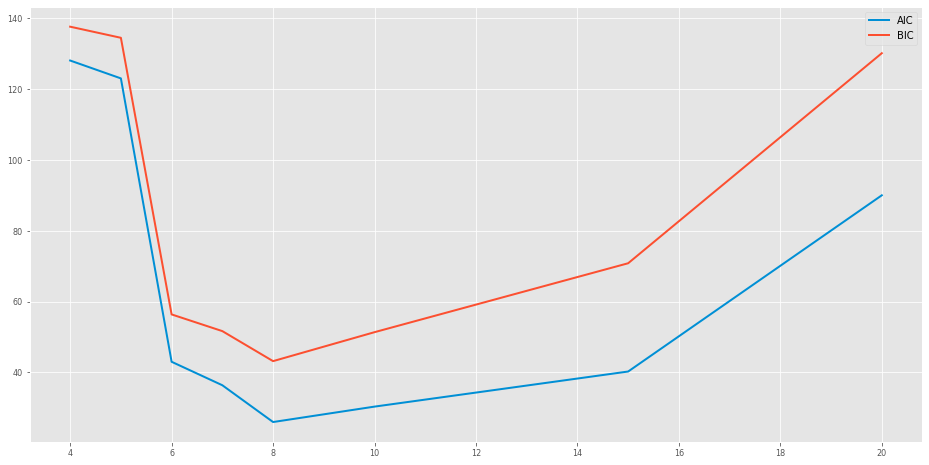

In [60]:
fig = plt.figure(figsize=(16,8))
plt.plot(degs, aic, color=colors[0], label='AIC')
plt.plot(degs, bic, color=colors[1], label='BIC')
plt.legend()
plt.show()

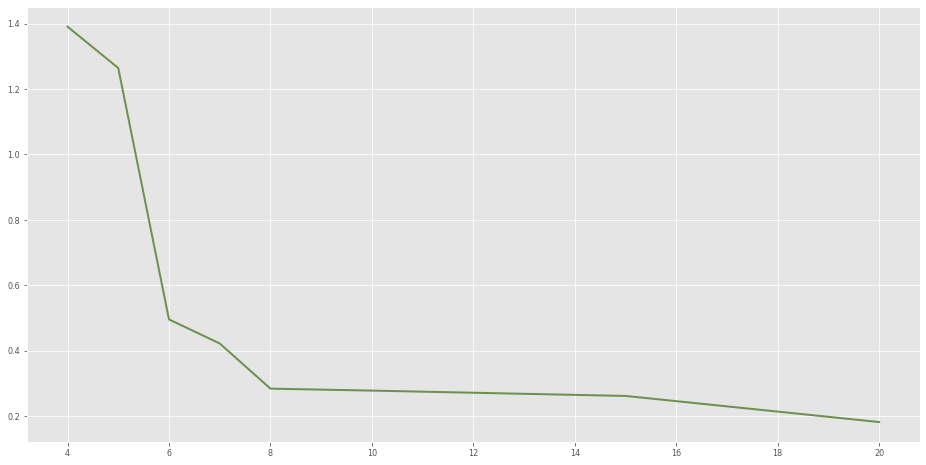

In [61]:
fig=plt.figure(figsize=(16,8))
plt.plot(degs,rmse_train, color=colors[3])
plt.show()

In [62]:
print('AIC minimo per degree = {}'.format(degs[np.argmin(aic)]))
print('BIC minimo per degree = {}'.format(degs[np.argmin(bic)]))
print('RMSE training set minimo per degree = {}'.format(degs[np.argmin(rmse_train)]))

AIC minimo per degree = 8
BIC minimo per degree = 8
RMSE training set minimo per degree = 20
